Simulating 1000 individual battle rounds...


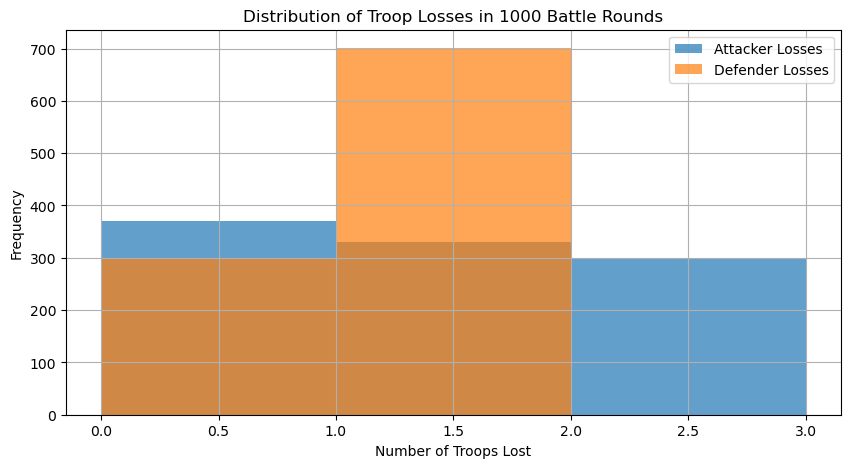

Simulating a full battle with 20 attackers and 15 defenders...
Battle lasted for 17 rounds.


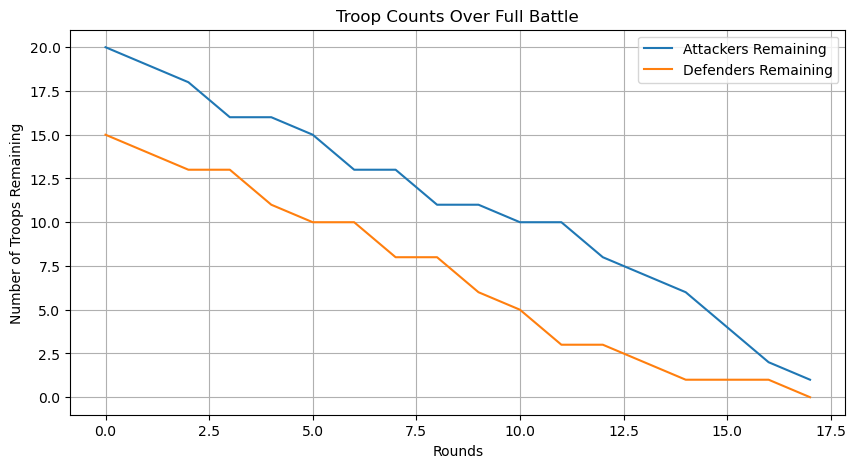

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Simulates one battle round by rolling dice (random function) for attackers and defenders.
def battle_round():
    attacker_dice = sorted([random.randint(1, 6) for _ in range(3)], reverse=True)
    defender_dice = sorted([random.randint(1, 6) for _ in range(2)], reverse=True)
    
    attacker_losses, defender_losses = 0, 0
    
    # compare the two highest rolls and determines troop losses.
    for a, d in zip(attacker_dice[:2], defender_dice):
        if a > d:
            defender_losses += 1
        else:
            attacker_losses += 1
    
    return attacker_losses, defender_losses

# Simulates 1000 independent rounds and records troop losses for visualization.
def simulate_battle_rounds(num_rounds=1000):
    attacker_losses_list = []
    defender_losses_list = []
    
    for _ in range(num_rounds):
        attacker_losses, defender_losses = battle_round()
        attacker_losses_list.append(attacker_losses)
        defender_losses_list.append(defender_losses)
    
    return attacker_losses_list, defender_losses_list

# Simulates a full series of rounds for armies of arbitrary sizes until one side wins
def simulate_full_battle(attackers, defenders):
    attacker_count = attackers
    defender_count = defenders
    rounds = 0
    attacker_remaining = [attackers]
    defender_remaining = [defenders]
    
    while attacker_count > 0 and defender_count > 0:
        attackers_in_round = min(3, attacker_count)
        defenders_in_round = min(2, defender_count)
        
        attacker_losses, defender_losses = battle_round()
        
        # Adjust based on remaining troops
        attacker_count -= min(attacker_losses, attackers_in_round)
        defender_count -= min(defender_losses, defenders_in_round)
        
        rounds += 1
        attacker_remaining.append(attacker_count)
        defender_remaining.append(defender_count)
    
    return rounds, attacker_remaining, defender_remaining

# Visualization of results
def plot_battle_results(attacker_losses, defender_losses):
    plt.figure(figsize=(10, 5))
    plt.hist(attacker_losses, bins=range(0, 4), alpha=0.7, label='Attacker Losses')
    plt.hist(defender_losses, bins=range(0, 3), alpha=0.7, label='Defender Losses')
    plt.title('Distribution of Troop Losses in 1000 Battle Rounds')
    plt.xlabel('Number of Troops Lost')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid()
    plt.show()

# Visualization of full battle simulation results
def plot_full_battle(attacker_remaining, defender_remaining):
    plt.figure(figsize=(10, 5))
    plt.plot(attacker_remaining, label='Attackers Remaining')
    plt.plot(defender_remaining, label='Defenders Remaining')
    plt.title('Troop Counts Over Full Battle')
    plt.xlabel('Rounds')
    plt.ylabel('Number of Troops Remaining')
    plt.legend()
    plt.grid()
    plt.show()

# Main Simulation
if __name__ == "__main__":
    # Simulate 1000 rounds
    attacker_losses, defender_losses = simulate_battle_rounds()
    print("Simulating 1000 individual battle rounds...")
    plot_battle_results(attacker_losses, defender_losses)
    
    # Simulate full battle with arbitrary army sizes
    attackers = 20
    defenders = 15
    print(f"Simulating a full battle with {attackers} attackers and {defenders} defenders...")
    rounds, attacker_remaining, defender_remaining = simulate_full_battle(attackers, defenders)
    print(f"Battle lasted for {rounds} rounds.")
    plot_full_battle(attacker_remaining, defender_remaining)
